In [1]:
import json
import numpy as np
import pandas as pd
import requests

In [2]:
srcsm_json = requests.get('https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json')

In [3]:
print(srcsm_json.text[0:500])

[
{"article_link": "https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5", "headline": "former versace store clerk sues over secret 'black code' for minority shoppers", "is_sarcastic": 0},
{"article_link": "https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365", "headline": "the 'roseanne' revival catches up to our thorny political mood, for better and worse", "is_sarcastic": 0},
{"article_link": "https://local.theonion.com/mom


In [4]:
sentences = []
labels = []
for item in srcsm_json.json():
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [5]:
sentences

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way',
 "advancing the world's women",
 'the fascinating case for eating lab-grown meat',
 'this ceo will send your kids to school, if you work for his company',
 'top snake handler leaves sinking huckabee campaign',
 "friday's morning email: inside trump's presser for the ages",
 'airline passengers tackle man who rushes cockpit in bomb threat',
 'facebook reportedly working on healthcare features and apps',
 "north korea praises trump and urges us voters to reject 'dull hillary'",
 "actually, cnn's jeffrey lord has been 'indefensible' for a while",
 'barcelona holds huge protest in su

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(sentences,labels,test_size=0.25,random_state=42)

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
tokenizer = Tokenizer(num_words=10000,oov_token='OOV')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print(word_index)

{'OOV': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'from': 15, 'at': 16, 'about': 17, 'you': 18, 'this': 19, 'by': 20, 'up': 21, 'after': 22, 'be': 23, 'out': 24, 'how': 25, 'it': 26, 'as': 27, 'that': 28, 'not': 29, 'your': 30, 'his': 31, 'are': 32, 'what': 33, 'he': 34, 'has': 35, 'just': 36, 'all': 37, 'who': 38, 'will': 39, 'one': 40, 'more': 41, 'into': 42, 'report': 43, 'area': 44, 'have': 45, 'why': 46, 'donald': 47, 'year': 48, 'u': 49, 'over': 50, 'can': 51, 's': 52, 'says': 53, 'day': 54, 'woman': 55, 'first': 56, 'time': 57, 'her': 58, "trump's": 59, 'no': 60, 'old': 61, 'an': 62, 'off': 63, 'like': 64, 'get': 65, 'obama': 66, 'life': 67, 'now': 68, 'people': 69, 'make': 70, 'was': 71, "'": 72, 'still': 73, 'than': 74, 'if': 75, 'back': 76, 'house': 77, 'i': 78, 'women': 79, 'down': 80, 'my': 81, '5': 82, 'when': 83, 'clinton': 84, 'white': 85, 'world': 86, 'could': 87, 'we': 88, 'way'

**Creating a Padded Sequences**

In [9]:
vocal_size = 10000
oov_tok = '<oov>'
max_length = 100
trunc_type = 'post'
padding_type = 'post'

X_train = tokenizer.texts_to_sequences(X_train)
X_train_padd = pad_sequences(X_train,maxlen=80,padding='post',truncating='post')


X_test = tokenizer.texts_to_sequences(X_test)
X_test_padd = pad_sequences(X_test,maxlen=80,padding='post',truncating='post')

In [10]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Bidirectional,Dense,Dropout

In [13]:
embedding_dim = 16
model = Sequential()
model.add(Embedding(vocal_size,embedding_dim,input_length = max_length))
model.add(Bidirectional(LSTM(60)))
model.add(Dropout(0.4))
model.add(Dense(45,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
X_train_padd = np.array(X_train_padd)
X_test_padd = np.array(X_test_padd)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [16]:
model.fit(X_train_padd,y_train,epochs=30,validation_data=(X_test_padd,y_test))

Epoch 1/30
626/626 [==============================] - 9s 15ms/step - loss: 0.4150 - accuracy: 0.7969 - val_loss: 0.3373 - val_accuracy: 0.8452
Epoch 2/30
626/626 [==============================] - 9s 14ms/step - loss: 0.2298 - accuracy: 0.9081 - val_loss: 0.3355 - val_accuracy: 0.8603
Epoch 3/30
626/626 [==============================] - 9s 15ms/step - loss: 0.1598 - accuracy: 0.9404 - val_loss: 0.3861 - val_accuracy: 0.8582
Epoch 4/30
626/626 [==============================] - 9s 15ms/step - loss: 0.1027 - accuracy: 0.9634 - val_loss: 0.4346 - val_accuracy: 0.8503
Epoch 5/30
626/626 [==============================] - 8s 13ms/step - loss: 0.0641 - accuracy: 0.9784 - val_loss: 0.5109 - val_accuracy: 0.8431
Epoch 6/30
626/626 [==============================] - 8s 13ms/step - loss: 0.0418 - accuracy: 0.9864 - val_loss: 0.6560 - val_accuracy: 0.8437
Epoch 7/30
626/626 [==============================] - 9s 14ms/step - loss: 0.0327 - accuracy: 0.9894 - val_loss: 0.6891 - val_accuracy: 0.8378

In [17]:
metrices = pd.DataFrame(model.history.history)

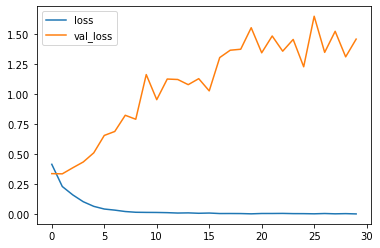

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
metrices[['loss','val_loss']].plot()

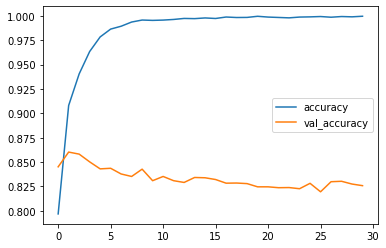

In [19]:
metrices[['accuracy','val_accuracy']].plot()

**Try Some Predictions**

In [20]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sentence = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sentence,maxlen=max_length,padding=padding_type,truncating=trunc_type)
print(np.argmax(model.predict(padded)))

0


In [21]:
sentence = ["Even some of the best life lessons we learn are from the most sarcastic quotes we read over the internet or from our dearest friends and family","Although some people find it difficult to understand the hidden meaning of our sarcastic messages, others have no problem in finding the sense of it at all."]
sentence = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sentence,maxlen=max_length,padding=padding_type,truncating=trunc_type)
print(np.argmax(model.predict(padded)))

1


**Saving the Model**

In [ ]:
model.save('model.h5')